In [1]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense


In [2]:
data=pd.read_csv('data.csv')

In [55]:
data1=pd.read_csv('data1.csv')

In [ ]:
data

,timestamp,MOER,MOER version,frequency
0,2021-12-01T00:00:00+00:00,950,3,300
1,2021-12-01T00:05:00+00:00,971,3,300
2,2021-12-01T00:10:00+00:00,964,3,300
3,2021-12-01T00:15:00+00:00,968,3,300
4,2021-12-01T00:20:00+00:00,966,3,300
...,...,...,...,...
8923,2021-12-31T23:35:00+00:00,1039,3,300
8924,2021-12-31T23:40:00+00:00,1072,3,300
8925,2021-12-31T23:45:00+00:00,1071,3,300
8926,2021-12-31T23:50:00+00:00,1080,3,300


In [56]:
data_test= data1['MOER']

In [3]:
data_model= data['MOER']

In [4]:
data_model[:10]

0    950
1    971
2    964
3    968
4    966
5    965
6    965
7    961
8    959
9    957
Name: MOER, dtype: int64

In [5]:
for i in range(4,10):
    print(i)

4
5
6
7
8
9


In [ ]:
for i in range(len(data)-4):
    X.append(data.iloc[i:i+4])
    y.append(data.iloc[i+4])

In [ ]:
data.iloc[4-4:4]

,timestamp,MOER,MOER version,frequency
0,2021-12-01T00:00:00+00:00,950,3,300
1,2021-12-01T00:05:00+00:00,971,3,300
2,2021-12-01T00:10:00+00:00,964,3,300
3,2021-12-01T00:15:00+00:00,968,3,300


In [43]:
def prepare_data(data, n_prev=4):
    X, y = [], []
    for i in range(n_prev, len(data)):
        X.append(data.iloc[i-n_prev:i])
        y.append(data.iloc[i])
    return np.array(X), np.array(y)


In [44]:
train_size = int(len(data) * 0.8)
train_data = data_model.iloc[:train_size]
test_data = data_model.iloc[train_size:]


In [45]:
X_train, y_train = prepare_data(train_data)
X_test, y_test = prepare_data(test_data)


In [59]:
X_TEST_OVERFIT,Y_TEST_OVERFIT = prepare_data(data_test)


In [47]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(27, activation='relu'))
model.add(Dense(20, activation='linear'))
model.add(Dense(17, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')


In [48]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
201/201 [==============================] - 2s 3ms/step - loss: 57356.3633 - val_loss: 15116.5283
Epoch 2/50
201/201 [==============================] - 0s 2ms/step - loss: 4556.5571 - val_loss: 14250.7539
Epoch 3/50
201/201 [==============================] - 1s 3ms/step - loss: 4451.2886 - val_loss: 14485.4248
Epoch 4/50
201/201 [==============================] - 0s 2ms/step - loss: 4324.5107 - val_loss: 14604.5039
Epoch 5/50
201/201 [==============================] - 1s 3ms/step - loss: 4278.8213 - val_loss: 14381.5420
Epoch 6/50
201/201 [==============================] - 0s 2ms/step - loss: 4360.9277 - val_loss: 13959.5000
Epoch 7/50
201/201 [==============================] - 0s 2ms/step - loss: 4305.6807 - val_loss: 14676.3262
Epoch 8/50
201/201 [==============================] - 0s 2ms/step - loss: 4163.8862 - val_loss: 15007.0811
Epoch 9/50
201/201 [==============================] - 1s 3ms/step - loss: 4207.8003 - val_loss: 14758.1699
Epoch 10/50
201/201 [===============

In [50]:
y_pred=model.predict(X_test)

56/56 [==============================] - 0s 1ms/step


In [16]:
y_pred.shape

(1782, 1)

In [60]:
Y_PRED_OVERFIT=model.predict(X_TEST_OVERFIT)

279/279 [==============================] - 1s 3ms/step


(100.0, 300.0)

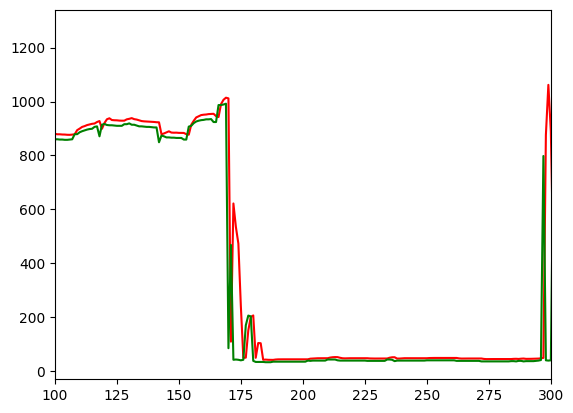

In [63]:
import matplotlib.pyplot as plt
plt.plot(Y_PRED_OVERFIT, color='r')
plt.plot(Y_TEST_OVERFIT, color='g')
plt.xlim(100,300)

In [28]:
y_test

array([  45,   45,   45, ..., 1071, 1080, 1078])

In [29]:
y_pred

array([[  49.977875],
       [  50.617702],
       [  50.769386],
       ...,
       [1049.5957  ],
       [1072.7529  ],
       [1078.8191  ]], dtype=float32)

(0.0, 200.0)

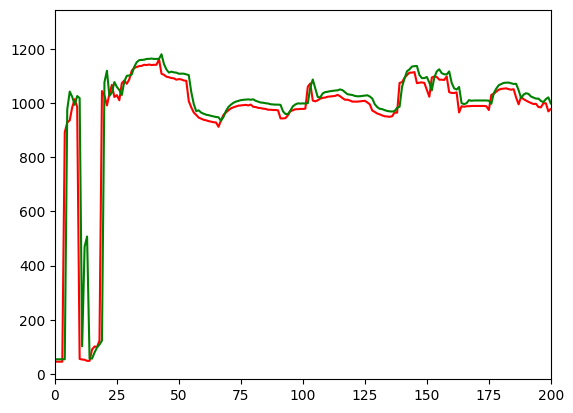

In [54]:
import matplotlib.pyplot as plt
plt.plot(y_test, color='r')
plt.plot(y_pred, color='g')
plt.xlim(0,200)

In [ ]:
# Préparer les données pour la prédiction initiale
X_test = np.array([  48,   44,   44,   45])
y_test = np.array([45])
## faut juste mettre la premiere prédiction

# Effectuer la première prédiction
predictions = model.predict(X_test)

# Ajouter la première prédiction à une liste
all_predictions = predictions.tolist()

# Boucle pour effectuer des prédictions supplémentaires en utilisant les prédictions précédentes comme entrée
for i in range(10):
    # Utiliser les prédictions précédentes pour créer de nouvelles entrées
    X_test_new = np.concatenate([X_test[:, 1:], predictions.reshape(-1, 1)], axis=1)
    
    # Effectuer une nouvelle prédiction
    predictions = model.predict(X_test_new)
    
    # Ajouter la prédiction à la liste des prédictions
    all_predictions.extend(predictions.tolist())


NameError: name 'model' is not defined

In [ ]:
### lstm

In [31]:
def prepare_data(data, n_prev=4):
    X, y = [], []
    for i in range(n_prev, len(data)):
        X.append(data.iloc[i-n_prev:i].values)

        y.append(data.iloc[i])
    return np.array(X), np.array(y)

X, y = prepare_data(data_model)


In [32]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [33]:
train_size = int(len(X) * 0.7)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]


In [34]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
X_train.shape

(6246, 4, 1)

In [36]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(17, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')


In [37]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
176/176 [==============================] - 4s 7ms/step - loss: 934891.7500 - val_loss: 823936.6875
Epoch 2/50
176/176 [==============================] - 1s 6ms/step - loss: 276311.3438 - val_loss: 3151.0149
Epoch 3/50
176/176 [==============================] - 1s 5ms/step - loss: 9964.7002 - val_loss: 2778.5901
Epoch 4/50
176/176 [==============================] - 1s 7ms/step - loss: 7638.0859 - val_loss: 1235.2324
Epoch 5/50
176/176 [==============================] - 1s 6ms/step - loss: 6692.3574 - val_loss: 1337.3173
Epoch 6/50
176/176 [==============================] - 1s 5ms/step - loss: 6217.6465 - val_loss: 612.8663
Epoch 7/50
176/176 [==============================] - 1s 5ms/step - loss: 5516.2422 - val_loss: 645.4265
Epoch 8/50
176/176 [==============================] - 1s 5ms/step - loss: 5186.8032 - val_loss: 661.2366
Epoch 9/50
176/176 [==============================] - 1s 5ms/step - loss: 5186.9751 - val_loss: 558.0422
Epoch 10/50
176/176 [=======================

In [38]:
y_pred=model.predict(X_test)

84/84 [==============================] - 1s 2ms/step


In [39]:
y_test

array([ 965,  965,  957, ..., 1071, 1080, 1078])

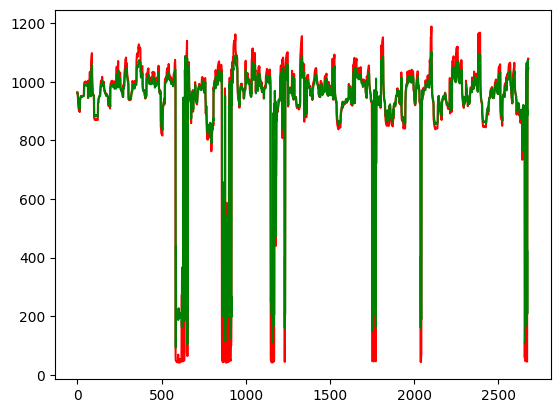

In [40]:
import matplotlib.pyplot as plt
plt.plot(y_test, color='r')
plt.plot(y_pred, color='g')

In [42]:
y_pred

array([[ 961.16144],
       [ 961.9649 ],
       [ 961.94934],
       ...,
       [1041.4631 ],
       [1040.2471 ],
       [1046.2297 ]], dtype=float32)

In [41]:
y_test

array([ 965,  965,  957, ..., 1071, 1080, 1078])

In [ ]:
score = model.evaluate(X_test, y_test, batch_size=32)
print("Test loss:", score)


In [ ]:
# Préparer les données pour la prédiction initiale
X_test, y_test = prepare_data(data_model)

# Effectuer la première prédiction
predictions = model.predict(X_test)

# Ajouter la première prédiction à une liste
all_predictions = predictions.tolist()

# Boucle pour effectuer des prédictions supplémentaires en utilisant les prédictions précédentes comme entrée
for i in range(10):
    # Utiliser les prédictions précédentes pour créer de nouvelles entrées
    X_test_new = np.concatenate([X_test[:, 1:, :], predictions.reshape(-1, 1, 1)], axis=1)
    
    # Effectuer une nouvelle prédiction
    predictions = model.predict(X_test_new)
    
    # Ajouter la prédiction à la liste des prédictions
    all_predictions.extend(predictions.tolist())
